# [실습3] 금속분말 생성공정 최적화를 위한 머신러닝 기법 (정답)


---

## 실습 목표
---
- 회귀 모델에 적용할 수 있도록 데이터셋을 불러오고 활용해봅니다.
- 회귀 모델을 구현하여, 학습과 테스트 및 평가해봅니다.

## 실습 목차
---
1. **회귀 모델 실습:** 회귀 모델을 사용하여 학습 수행, 평가 및 예측 수행

2. **데이터 읽기:** 금속분말 데이터를 불러오고 데이터 이해

3. **회귀 모델 수행:** 금속분말 데이터셋을 이용하여 회귀모델 학습

## 실습 개요
---

이번 실습에서는 금속분말 데이터를 이용하여 회귀 머신러닝 모델을 학습하고, 예측 및 평가해봅니다. 

## 1. 회귀 모델 실습
---
다양한 회귀 모델의 실습을 해보겠습니다.


### 1.1 단변량 단일 선형 회귀

### 1.1.1 라이브러리 불러오기

In [333]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn

### 1.1.2 데이터 생성

독립변수가 1개이고, 종속변수도 1개인 데이터를 생성해보겠습니다.

In [334]:
X = np.random.normal(size = (1000))
beta_1 = 3
beta_0 = 2
y = X * beta_1 + beta_0 + np.random.normal(scale = 0.8, size = (1000))

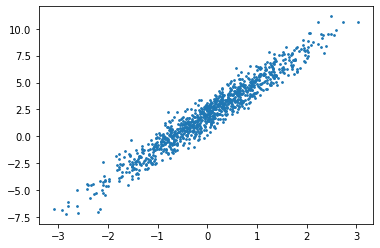

In [335]:
plt.scatter(X, y, s = 3)
plt.show()

### 1.1.3 데이터 분할

In [336]:
train_ratio = 0.8
train_X = X[:int(len(X) * train_ratio)].reshape(-1, 1)
train_y = y[:int(len(X) * train_ratio)].reshape(-1, 1)
test_X = X[int(len(X) * train_ratio):].reshape(-1, 1)
test_y = y[int(len(X) * train_ratio):].reshape(-1, 1)

### 1.1.4 최소 제곱 선형 회귀 모델 학습

In [337]:
from sklearn.linear_model import LinearRegression

In [338]:
fitter = LinearRegression()
fitter

LinearRegression()

In [339]:
fitter.fit(train_X, train_y)

LinearRegression()

In [340]:
pred_beta_1 = fitter.coef_
pred_beta_0 = fitter.intercept_
print('실제 식: y = %f X + %f'%(beta_1, beta_0))
print('예측 식: y = %f X + %f'%(pred_beta_1, pred_beta_0))

실제 식: y = 3.000000 X + 2.000000
예측 식: y = 3.018445 X + 2.031243


### 1.1.5 최소 제곱 선형 회귀 모델 예측

In [341]:
pred = fitter.predict(test_X)

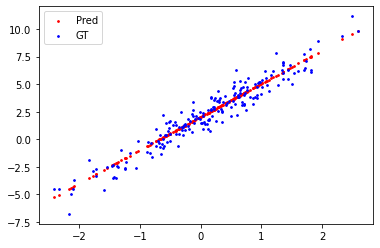

In [342]:
plt.scatter(test_X, pred, s = 3, c = 'red', label = 'Pred')
plt.scatter(test_X, test_y, s = 3, c = 'blue', label = 'GT')
plt.legend()
plt.show()

### 1.1.6 최소 제곱 선형 회귀 모델 평가

In [343]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [344]:
def RSS(gt, pred):
    return ( (gt - pred) ** 2 ).sum()

rss = RSS(test_y, pred)
print("RSS: %f"%rss)

RSS: 140.956139


In [345]:
def MSE(gt, pred):
    return ( (gt - pred) ** 2 ).sum() / len(pred)

mse = MSE(test_y, pred)
print("MSE: %f"%mse)
print(mean_squared_error(test_y, pred))

MSE: 0.704781
0.7047806934202518


In [346]:
def MAE(gt, pred):
    return ( np.abs(gt - pred) ).sum() / len(pred)

mae = MAE(test_y, pred)
print("MAE: %f"%mae)
print(mean_absolute_error(test_y, pred))

MAE: 0.669842
0.6698417839888555


In [347]:
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: 0.925424


### 1.2 단병량 다중 선형 회귀

### 1.2.1 데이터 생성
1.2.1 독립변수가 2개 이상이고, 종속변수가 1개인 데이터를 생성합니다.

In [348]:
X1 = np.random.normal(loc = 0, scale = 1, size = (1000, 1))
X2 = np.random.normal(loc = 2, scale = 0.5, size = (1000, 1))
X3 = np.random.normal(loc = 1, scale = 1, size = (1000, 1))
X4 = X1 * 2 + np.random.normal(scale = 0.1, size = (1000, 1))

beta_0 = 2
beta_1 = 1
beta_2 = 3
beta_3 = 0
beta_4 = 1

X = np.concatenate([X1, X2, X3, X4], axis = 1)
y = beta_0 + beta_1 * X1 + beta_2 * X2 + beta_3 * X3 + beta_4 * X4 + np.random.normal(size = (1000, 1)) * 0.5

### 1.2.2 상관분석

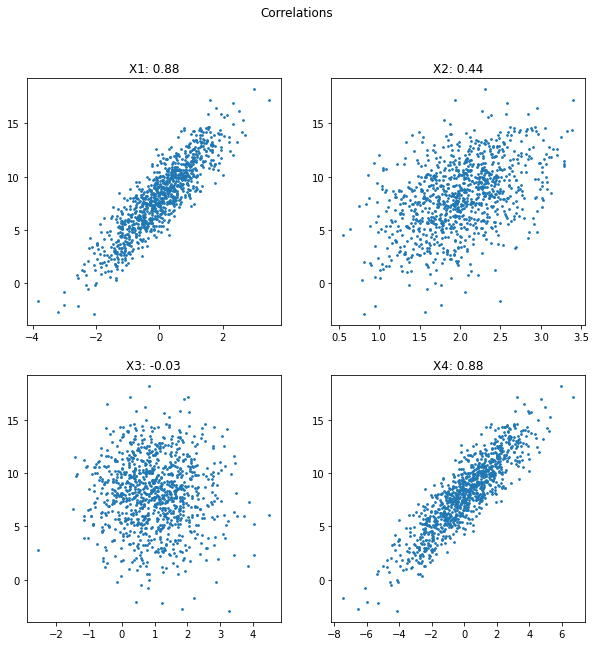

In [349]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
fig.suptitle('Correlations')

ax[0, 0].scatter(X1[:, 0], y[:, 0], s = 3)
ax[0, 0].set_title('X1: %.2f'%np.corrcoef(X1[:, 0], y[:, 0])[0, 1])

ax[0, 1].scatter(X2[:, 0], y[:, 0], s = 3)
ax[0, 1].set_title('X2: %.2f'%np.corrcoef(X2[:, 0], y[:, 0])[0, 1])

ax[1, 0].scatter(X3[:, 0], y[:, 0], s = 3)
ax[1, 0].set_title('X3: %.2f'%np.corrcoef(X3[:, 0], y[:, 0])[0, 1])

ax[1, 1].scatter(X4[:, 0], y[:, 0], s = 3)
ax[1, 1].set_title('X4: %.2f'%np.corrcoef(X4[:, 0], y[:, 0])[0, 1])
plt.show()

X3 은 종속변수와 상관관계가 매우 낮으므로 제거해줍니다.

In [350]:
X = X[:, [0, 1, 3]]

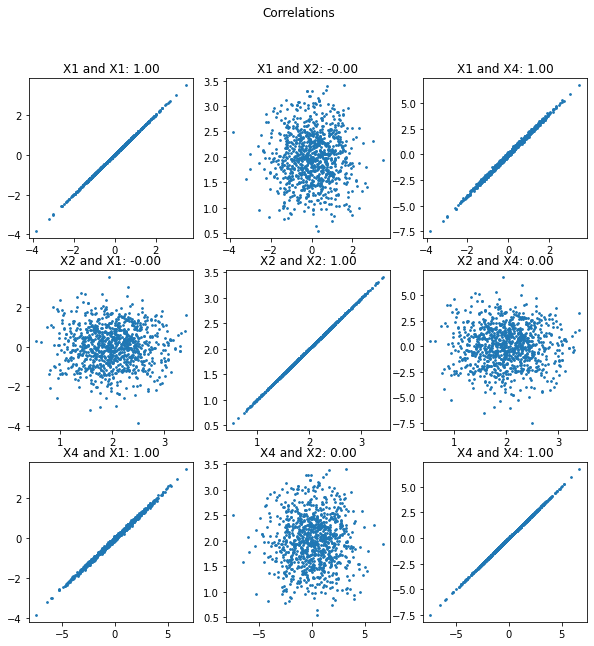

In [351]:
fig, ax = plt.subplots(3, 3, figsize = (10, 10))
fig.suptitle('Correlations')
X_labels = ['X1', 'X2', 'X4']

for i in range(3):
    for t in range(3):
        ax[i, t].scatter(X[:, i], X[:, t], s = 3)
        ax[i, t].set_title('%s and %s: %.2f'%(X_labels[i], X_labels[t], np.corrcoef(X[:, i], X[:, t])[0, 1]))
plt.show()

X1 과 X4 의 상관관계가 매우 높으므로 X4를 제거해줍니다.

In [352]:
X = X[:, [0, 1]]

### 1.2.3 데이터 분할

In [353]:
train_ratio = 0.8
train_X = X[:int(len(X) * train_ratio)]
train_y = y[:int(len(X) * train_ratio)]
test_X = X[int(len(X) * train_ratio):]
test_y = y[int(len(X) * train_ratio):]

### 1.2.4 최소 제곱 선형 회귀 모델 학습

In [354]:
fitter = sklearn.linear_model.LinearRegression()
fitter

LinearRegression()

In [355]:
fitter.fit(train_X, train_y)

LinearRegression()

In [356]:
pred_beta_1, pred_beta_2 = fitter.coef_[0]
pred_beta_0 = fitter.intercept_
print('실제 식: y = %f + %f X1 + %f X2 + %f X3 + %f X4'%(beta_0, beta_1, beta_2, beta_3, beta_4))
print('예측 식: y = %f + %f X1 + %f X2'%(pred_beta_0, pred_beta_1, pred_beta_2))

실제 식: y = 2.000000 + 1.000000 X1 + 3.000000 X2 + 0.000000 X3 + 1.000000 X4
예측 식: y = 2.066102 + 2.986171 X1 + 2.980232 X2


### 1.2.5 최소 제곱 선형 회귀 모델 예측

In [357]:
pred = fitter.predict(test_X)

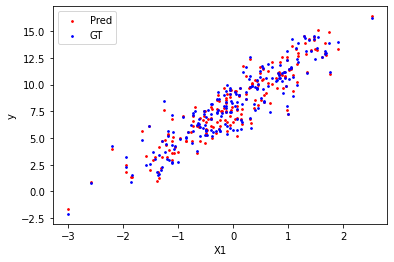

In [358]:
plt.scatter(test_X[:, 0], pred.reshape(-1), s = 3, c = 'red', label = 'Pred')
plt.scatter(test_X[:, 0], test_y.reshape(-1), s = 3, c = 'blue', label = 'GT')
plt.xlabel('X1')
plt.ylabel('y')
plt.legend()
plt.show()

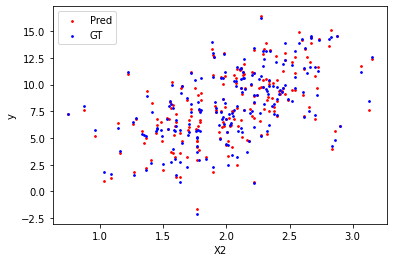

In [359]:
plt.scatter(test_X[:, 1], pred.reshape(-1), s = 3, c = 'red', label = 'Pred')
plt.scatter(test_X[:, 1], test_y.reshape(-1), s = 3, c = 'blue', label = 'GT')
plt.xlabel('X2')
plt.ylabel('y')
plt.legend()
plt.show()

### 1.2.6 최소 제곱 선형 회귀 모델 평가

In [360]:
def RSS(gt, pred):
    return ( (gt - pred) ** 2 ).sum()

rss = RSS(test_y, pred)
print("RSS: %f"%rss)

RSS: 54.285270


In [361]:
def MSE(gt, pred):
    return ( (gt - pred) ** 2 ).sum() / len(pred)

mse = MSE(test_y, pred)
print("MSE: %f"%mse)
print(mean_squared_error(test_y,pred))

MSE: 0.271426
0.2714263487953817


In [362]:
def MAE(gt, pred):
    return ( np.abs(gt - pred) ).sum() / len(pred)

mae = MAE(test_y, pred)
print("MAE: %f"%mae)
print(mean_absolute_error(test_y, pred))

MAE: 0.409000
0.4090001064340703


In [363]:
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: 0.975989


### 1.3 다변량 다중 선형 회귀

### 1.3.1 데이터 생성
독립변수와 종속변수가 모두 2개 이상인 데이터를 생성해보겠습니다.

In [364]:
X = np.random.normal(size = (1000, 3)) # 3개 독립변수, 1000개의 데이터
y1 = X[:, 0] + X[:, 1] + np.random.normal(size = (1000)) * 0.3
y2 = X[:, 0] * 2 + X[:, 1] + X[:, 2] * 0.1 + np.random.normal(size = (1000)) * 0.3
y = np.concatenate([y1.reshape(-1, 1), y2.reshape(-1, 1)], axis = 1) # 2개의 종속 변수

In [365]:
print(X.shape)
print(y.shape)

(1000, 3)
(1000, 2)


### 1.3.2 데이터 시각화

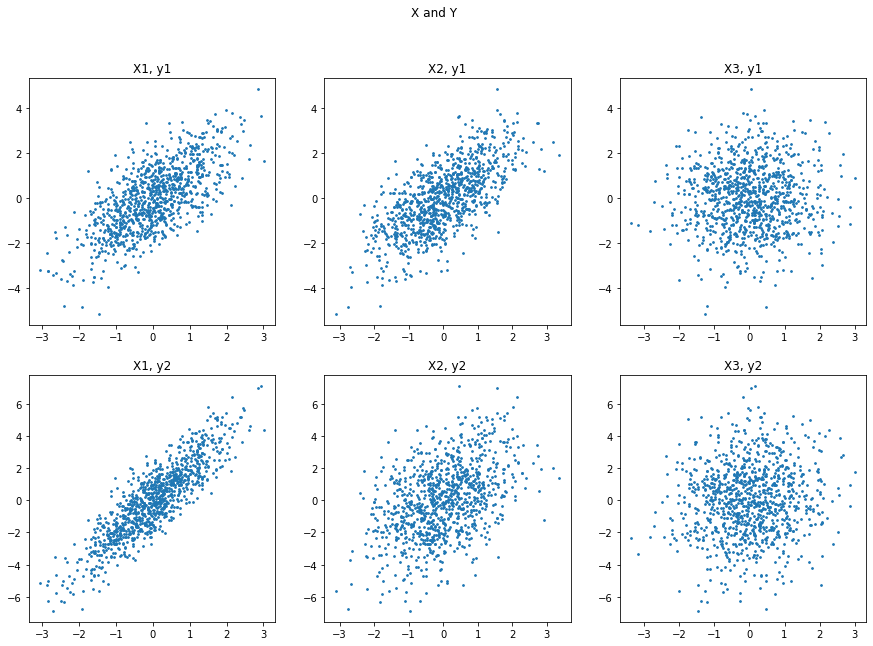

In [366]:
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
fig.suptitle('X and Y')

for i in range(2):
    for t in range(3):
        ax[i, t].scatter(X[:, t], y[:, i], s = 3)
        ax[i, t].set_title('X%d, y%s'%(t+1, i+1))
plt.show()

### 1.3.3 데이터 분할

In [367]:
train_ratio = 0.8
train_X = X[:int(len(X) * train_ratio)]
train_y = y[:int(len(X) * train_ratio)]
test_X = X[int(len(X) * train_ratio):]
test_y = y[int(len(X) * train_ratio):]

### 1.3.4 최소 제곱 선형 회귀 모델 학습

In [368]:
fitter = LinearRegression()
fitter

LinearRegression()

In [369]:
fitter.fit(train_X, train_y)

LinearRegression()

### 1.3.5 최소 제곱 선형 회귀 모델 예측

In [370]:
pred = fitter.predict(test_X)

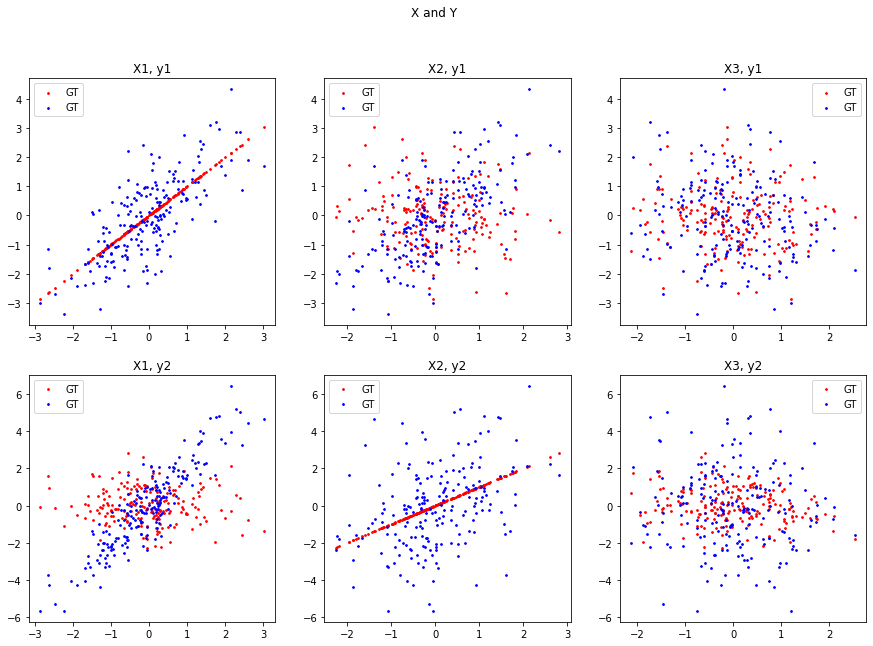

In [371]:
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
fig.suptitle('X and Y')

for i in range(2):
    for t in range(3):
        ax[i, t].scatter(test_X[:, t], test_y[:, i], s = 3, c = 'red', label = 'GT')
        ax[i, t].scatter(test_X[:, t], pred[:, i], s = 3, c = 'blue', label = 'GT')
        ax[i, t].set_title('X%d, y%s'%(t+1, i+1))
        ax[i, t].legend()
plt.show()

### 1.3.6 최소 제곱 선형 회귀 모델 평가

In [372]:
def RSS(gt, pred):
    return ( (gt - pred) ** 2 ).sum()

rss = RSS(test_y, pred)
print("RSS: %f"%rss)

RSS: 42.527450


In [373]:
def MSE(gt, pred):
    return np.mean(np.mean((gt - pred) ** 2, axis=0))

mse = MSE(test_y, pred)
print("MSE: %f"%mse)
print(mean_squared_error(test_y, pred))

MSE: 0.106319
0.10631862433403504


In [374]:
def MAE(gt, pred):
    return np.mean(np.mean(np.abs(gt - pred), axis=0))

mae = MAE(test_y, pred)
print("MAE: %f"%mae)
print(mean_absolute_error(test_y, pred))

MAE: 0.259128
0.2591284376043471


In [375]:
def R2_Score(gt, pred):
    rss = np.sum( (gt - pred) ** 2, axis=0 )
    tss = np.sum((gt - np.mean(gt, axis=0)) ** 2, axis=0)

    return np.mean(1 - (rss / tss))

r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)
print(R2_Score(test_y, pred))

R2 score: 0.961125
0.9611254245006307


### 1.4 피쳐 선택의 중요성

### 1.4.1 데이터 생성

In [376]:
np.random.seed(0) # 랜덤 시드 고정

In [377]:
X = np.random.normal(loc = 0, scale = 1, size = (1000, 100)) # 100 개 변수
y = 1 + 2 * X[:, 0:1] + 3 * X[:, 1:2] + np.random.normal(size = (1000, 1)) # 그 중 2개 변수만 y에 영향을 미침

X_pp = X[:, :2] # 상관 분석을 통해 2개 변수만 피쳐로 사용

### 1.4.2 데이터 시각화

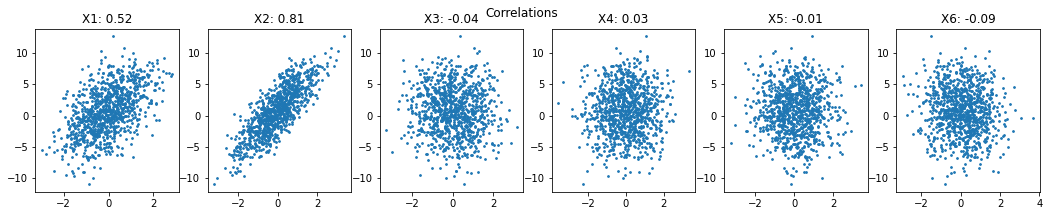

In [378]:
fig, ax = plt.subplots(1, 6, figsize = (18, 3))
fig.suptitle('Correlations')

ax[0].scatter(X[:, 0], y[:, 0], s = 3)
ax[0].set_title('X1: %.2f'%np.corrcoef(X[:, 0], y[:, 0])[0, 1])

ax[1].scatter(X[:, 1], y[:, 0], s = 3)
ax[1].set_title('X2: %.2f'%np.corrcoef(X[:, 1], y[:, 0])[0, 1])

ax[2].scatter(X[:, 2], y[:, 0], s = 3)
ax[2].set_title('X3: %.2f'%np.corrcoef(X[:, 2], y[:, 0])[0, 1])

ax[3].scatter(X[:, 3], y[:, 0], s = 3)
ax[3].set_title('X4: %.2f'%np.corrcoef(X[:, 3], y[:, 0])[0, 1])

ax[4].scatter(X[:, 4], y[:, 0], s = 3)
ax[4].set_title('X5: %.2f'%np.corrcoef(X[:, 4], y[:, 0])[0, 1])

ax[5].scatter(X[:, 5], y[:, 0], s = 3)
ax[5].set_title('X6: %.2f'%np.corrcoef(X[:, 5], y[:, 0])[0, 1])
plt.show()

### 1.4.3 데이터 분할

In [379]:
train_ratio = 0.8
train_X_pp = X_pp[:int(len(X) * train_ratio)]
train_X = X[:int(len(X) * train_ratio)]
train_y = y[:int(len(X) * train_ratio)]
test_X_pp = X_pp[int(len(X) * train_ratio):]
test_X = X[int(len(X) * train_ratio):]
test_y = y[int(len(X) * train_ratio):]

### 1.4.4 선형회귀 모델 적용

In [380]:
fitter = sklearn.linear_model.LinearRegression()
fitter.fit(train_X, train_y)
pred = fitter.predict(test_X)
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: 0.913232


In [381]:
fitter.coef_

array([[ 2.01277758e+00,  3.04490627e+00,  2.40911400e-04,
         1.01538819e-02,  7.66899841e-03,  4.37797353e-02,
        -1.04479151e-02,  2.09449070e-03,  5.74792358e-03,
         3.69909998e-02, -7.96538080e-03,  1.00775928e-02,
        -7.03068687e-02, -5.62152907e-03,  2.20865222e-02,
        -2.18886743e-02, -2.27839557e-03,  6.59094395e-02,
         3.10916486e-02,  5.65722598e-02,  5.40042396e-02,
        -8.58381124e-02, -2.03003447e-02, -2.14686199e-02,
        -5.76295955e-02, -2.56593524e-02, -3.05611907e-03,
        -6.84318017e-02, -4.32998241e-02, -4.53272679e-02,
         4.10366818e-02,  6.23727977e-03,  6.48003422e-02,
         5.22900096e-02,  6.07328969e-02,  3.81149233e-02,
         7.87402756e-03,  6.74130428e-03, -2.36387114e-02,
        -3.89424550e-02, -6.33276383e-02, -7.04321596e-03,
        -1.28200073e-02,  2.67284785e-03, -2.83760523e-02,
        -5.38019647e-02, -9.99247839e-02,  1.27206022e-02,
         7.19554158e-02,  6.40952807e-03, -1.58158867e-0

In [382]:
fitter = sklearn.linear_model.LinearRegression()
fitter.fit(train_X_pp, train_y)
pred = fitter.predict(test_X_pp)
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: 0.929025


In [383]:
fitter.coef_

array([[2.00297855, 3.03875515]])

적절한 피쳐를 선택하여 모델을 학습하였을 때, 모델의 계수도 더 적으면서 (효율적) 더 좋은 설명력을 가지는 것을 확인할 수 있습니다.

### 1.5 피쳐 선택 자동화

### 1.5.1 라이브러리 불러오기

In [384]:
from sklearn.feature_selection import SelectFromModel

### 1.5.2 피쳐 선택

In [385]:
fitter = sklearn.linear_model.LinearRegression()

In [386]:
X_new = train_X
for i in range(2):
    fitter.fit(X_new, train_y)
    model = SelectFromModel(fitter, prefit=True)
    X_new = model.transform(X_new)

### 1.5.3 결과 확인

In [387]:
X_new.shape

(800, 2)

In [388]:
(X_new == train_X_pp).all()

True

## 2. 데이터 읽기
---
금속분말 데이터를 불러오고 정제한 후 전처리합니다.


### 2.1 라이브러리 불러오기

In [389]:
import numpy as np
import json

### 2.2 학습용, 검증용, 테스트용 데이터 읽어오기

In [390]:
stage1 = {
    'train_X': np.load('./Data/train_data_stage1_X.npy'),
    'train_y': np.load('./Data/train_data_stage1_y.npy'),
    'valid_X': np.load('./Data/valid_data_stage1_X.npy'),
    'valid_y': np.load('./Data/valid_data_stage1_y.npy'),
    'test_X': np.load('./Data/test_data_stage1_X.npy'),
    'test_y': np.load('./Data/test_data_stage1_y.npy'),
}

stage2 = {
    'train_X': np.load('./Data/train_data_stage2_X.npy'),
    'train_y': np.load('./Data/train_data_stage2_y.npy'),
    'valid_X': np.load('./Data/valid_data_stage2_X.npy'),
    'valid_y': np.load('./Data/valid_data_stage2_y.npy'),
    'test_X': np.load('./Data/test_data_stage2_X.npy'),
    'test_y': np.load('./Data/test_data_stage2_y.npy'),
}

columns = json.load(open('./Data/valid_columns.json', 'r'))

### 2.3 stage1 데이터 시각화하기

In [391]:
print('학습데이터 입력값 차원:', stage1['train_X'].shape)
print('학습데이터 출력값 차원:', stage1['train_y'].shape)

학습데이터 입력값 차원: (9016, 37)
학습데이터 출력값 차원: (9016, 15)


입력 변수 5개와 출력 변수 5개를 시각화해보겠습니다.

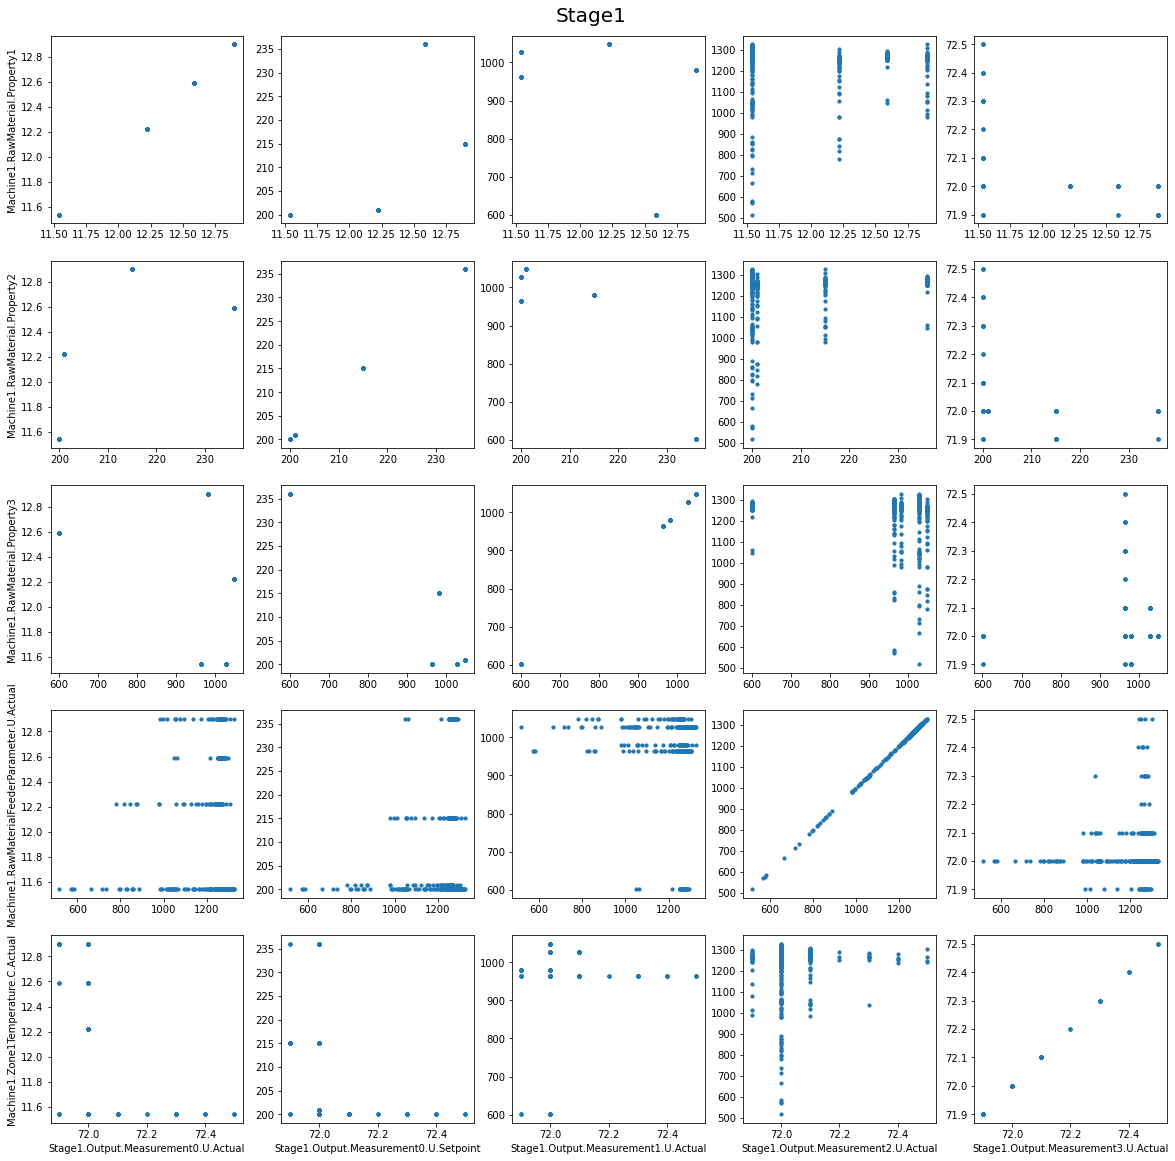

In [392]:
fig, ax = plt.subplots(5, 5, figsize = (20, 20))
fig.suptitle('Stage1', y= 0.9, size = 20)

for i in range(5):
    for t in range(5):
        if t == 0:
            ax[i, t].set(ylabel = columns['stage1_input'][i])
        if i == len(ax[0]) - 1:
            ax[i, t].set(xlabel = columns['stage1_output'][t])
        ax[i, t].scatter(stage1['train_X'][::10, i], stage1['train_X'][::10, t], s = 10)
plt.show()

### 2.4 stage1 데이터 표준화하기

학습용 데이터의 평균과 표준편차를 이용하여 데이터를 표준화해줍니다. 

In [393]:
stage1_X_mean = stage1['train_X'].mean(axis = 0)
stage1_y_mean = stage1['train_y'].mean(axis = 0)
print('입력값 평균:', stage1_X_mean)
print('출력값 평균:', stage1_y_mean)

입력값 평균: [  11.85294587  205.74478705  951.00255435 1242.437388     72.01273285
   72.01162996   70.34571071   11.07603585  408.95062376   81.47648118
   75.96962985   12.79330524  566.38390195  202.65058918   68.99620414
   69.10054828   73.3958155    13.89662164  226.12474952   76.81680896
   59.99898793    9.08815439  205.71384206  425.06943434  202.26546402
   78.00841235   78.00453278  345.11532917   13.26721071  246.73680272
   74.14375402   65.00868711  108.96768422   84.98831262   80.00354672
   15.32405834   23.84402174]
출력값 평균: [12.89768652 13.69662267  8.00480187 11.36113325 21.31940678 32.87843839
  0.12721732  1.34725458  1.09990652 19.8051213   7.68305334  1.4919701
  1.20588607  2.89104562 10.02515553]


In [394]:
stage1_X_std = stage1['train_X'].std(axis = 0)
stage1_y_std = stage1['train_y'].std(axis = 0)
print('입력값 표준편차:', stage1_X_std)
print('출력값 표준편차:', stage1_y_std)

입력값 표준편차: [5.10993143e-01 1.16806618e+01 1.27620111e+02 9.77321235e+01
 6.23396785e-02 4.06238919e-01 5.49867530e+00 6.36170724e-01
 2.05368437e+01 9.21642493e-01 2.06429784e+00 1.07360805e-01
 1.83380514e+01 1.48381842e+01 5.44970706e-02 1.06721153e-01
 3.94100055e-01 2.91335938e-02 3.06908107e+00 8.30358591e-01
 1.61971729e-01 3.95092636e-01 1.63223059e+01 9.53699574e+00
 1.58921785e+01 7.73526529e-02 1.14547773e-01 9.05396328e+00
 4.34061012e-01 6.10492128e+00 2.05042127e+00 6.27961350e-02
 5.59761035e+00 1.85637963e+01 1.18126539e-01 1.18770739e+00
 3.72221796e-01]
출력값 표준편차: [0.9270819  0.85503751 6.90580271 1.03664992 2.14313701 3.882343
 0.57606676 1.13060617 1.41265541 4.68687927 1.07824517 2.54294205
 0.66114934 0.92884134 7.38778856]


In [395]:
# 학습 데이터 표준화
stage1['train_X'] = (stage1['train_X'] - stage1_X_mean) / stage1_X_std
stage1['train_y'] = (stage1['train_y'] - stage1_y_mean) / stage1_y_std

In [396]:
# 검증용 데이터 표준화
stage1['valid_X'] = (stage1['valid_X'] - stage1_X_mean) / stage1_X_std
stage1['valid_y'] = (stage1['valid_y'] - stage1_y_mean) / stage1_y_std

In [397]:
# 테스트 데이터 표준화
stage1['test_X'] = (stage1['test_X'] - stage1_X_mean) / stage1_X_std
stage1['test_y'] = (stage1['test_y'] - stage1_y_mean) / stage1_y_std

In [398]:
stage1_X_mean = stage1['train_X'].mean(axis = 0)
stage1_y_mean = stage1['train_y'].mean(axis = 0)
print('입력값 평균:', stage1_X_mean)
print('출력값 평균:', stage1_y_mean)
stage1_X_std = stage1['train_X'].std(axis = 0)
stage1_y_std = stage1['train_y'].std(axis = 0)
print('입력값 표준편차:', stage1_X_std)
print('출력값 표준편차:', stage1_y_std)

입력값 평균: [ 3.37874262e-15  4.85858026e-16  4.30297619e-16  4.24386938e-16
  1.32887884e-14 -1.88554683e-14  3.57005168e-16 -1.36970195e-15
 -2.12784537e-17  1.39413276e-14 -4.60008646e-15  1.89583142e-14
  5.23075618e-15  1.09150587e-16 -2.35450031e-14  2.42152744e-14
  1.43325162e-14  2.87306411e-14  7.64881602e-15  1.08425543e-14
 -6.75236264e-15 -2.05061247e-15 -4.16900075e-16 -5.92644340e-15
 -1.45836217e-15  1.65660840e-13 -6.89581489e-14 -2.33668945e-15
  2.88786051e-15 -3.28397469e-15  8.31002426e-15 -6.61066390e-14
 -7.37259017e-16 -7.88090878e-16 -1.02038263e-13  5.12259071e-16
 -1.37513977e-14]
출력값 평균: [ 7.73314174e-16 -2.70315171e-16 -5.85157477e-17  8.25131149e-16
 -1.81773161e-15  1.71803811e-16  8.78721329e-17  4.37390437e-17
  8.27495422e-17  5.15805480e-16  7.27407881e-16  3.97985893e-17
 -1.21464507e-16  1.89141811e-16 -1.78108538e-16]
입력값 표준편차: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
출력값 표준편차: [1

In [399]:
stage1_X_mean = stage1['valid_X'].mean(axis = 0)
stage1_y_mean = stage1['valid_y'].mean(axis = 0)
print('입력값 평균:', stage1_X_mean)
print('출력값 평균:', stage1_y_mean)
stage1_X_std = stage1['valid_X'].std(axis = 0)
stage1_y_std = stage1['valid_y'].std(axis = 0)
print('입력값 표준편차:', stage1_X_std)
print('출력값 표준편차:', stage1_y_std)

입력값 평균: [-0.06963144 -0.09467981  0.08024287  0.007111    0.0775737   0.00430571
  0.05349952 -0.06789931  0.0822443  -0.01924951  0.00211787 -0.04566281
  0.04566281 -0.06034816 -0.01226206  0.00853839 -0.03082341  0.04498449
  0.0302595  -0.05811052  0.02760914  0.06692578 -0.07341574 -0.07729229
  0.01089209  0.0369284  -0.0124692   0.03311531  0.02552821  0.01742447
 -0.05864174  0.01426604 -0.07455757 -0.04388412  0.03007232  0.07096225
 -0.01104307]
출력값 평균: [-0.01160736 -0.02318713  0.03367649  0.01671101  0.04181947 -0.01509093
 -0.00917839 -0.00823161  0.04164745 -0.01352261 -0.04275136  0.03126063
 -0.0472596  -0.05558452 -0.06086314]
입력값 표준편차: [0.95630267 0.90099659 0.8911466  0.97663264 1.1339924  0.9925521
 1.02516756 0.97872877 0.94973894 1.05529231 0.97944677 1.02969482
 1.02969482 0.95464644 0.99359132 1.07341233 1.05931113 1.00790725
 1.04258196 1.12597931 1.04647058 1.0329022  0.99980142 1.0169139
 0.94273976 1.05369138 1.00981425 1.02584982 1.02120916 1.02143464
 1.06

### 2.4 stage2 데이터 시각화하기

In [400]:
print('학습데이터 입력값 차원:', stage2['train_X'].shape)
print('학습데이터 출력값 차원:', stage2['train_y'].shape)

학습데이터 입력값 차원: (9016, 30)
학습데이터 출력값 차원: (9016, 13)


마찬가지로, 입력변수 5개, 출력변수 5개에 대하여 시각화해봅니다.

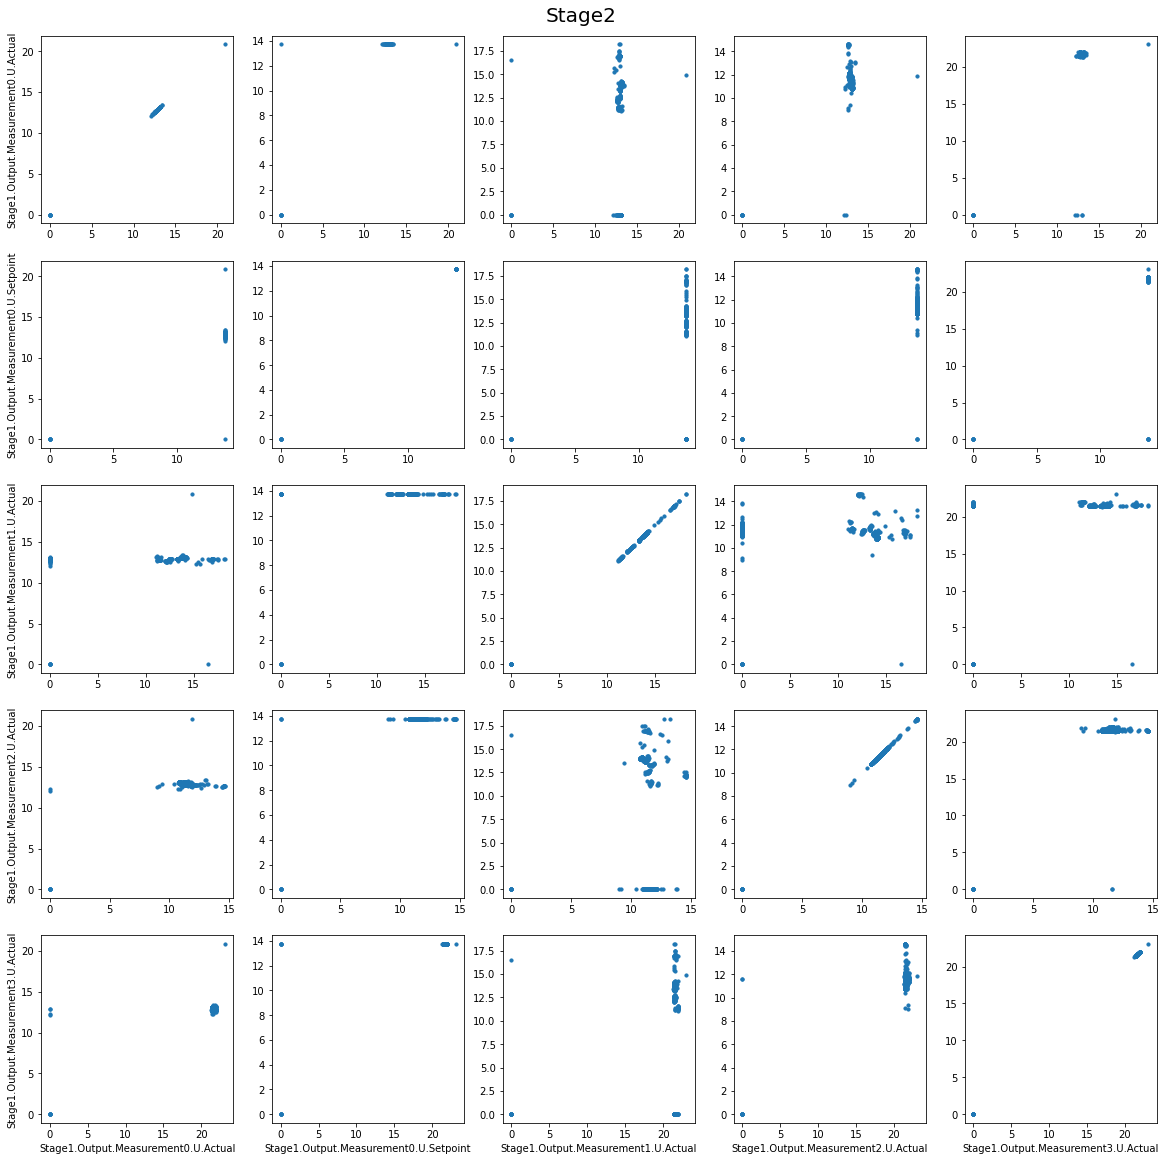

In [401]:
fig, ax = plt.subplots(5, 5, figsize = (20, 20))
fig.suptitle('Stage2', y= 0.9, size = 20)

for i in range(5):
    for t in range(5):
        if t == 0:
            ax[i, t].set(ylabel = columns['stage2_input'][i])
        if i == len(ax[0]) - 1:
            ax[i, t].set(xlabel = columns['stage2_output'][t])
        ax[i, t].scatter(stage2['train_X'][::10, i], stage2['train_X'][::10, t], s = 10)
plt.show()

### 2.5 stage2 데이터 표준화하기

In [402]:
stage2_X_mean = stage2['train_X'].mean(axis = 0)
stage2_y_mean = stage2['train_y'].mean(axis = 0)
print('입력값 평균:', stage2_X_mean)
print('출력값 평균:', stage2_y_mean)

입력값 평균: [1.28976865e+01 1.36966227e+01 8.00480187e+00 1.13611333e+01
 2.13194068e+01 3.28784384e+01 1.27217323e-01 1.34725458e+00
 1.09990652e+00 1.98051213e+01 7.68305334e+00 1.49197010e+00
 1.20588607e+00 2.89104562e+00 1.00251555e+01 3.60122933e+02
 3.60136275e+02 1.72294333e+01 3.22627969e+02 3.09786854e+02
 1.87200947e+02 3.09998282e+02 2.89997582e+02 2.69681649e+02
 2.42661246e+02 2.44994629e+02 6.34195390e+01 1.54046742e+02
 1.53240583e+01 2.38440217e+01]
출력값 평균: [11.69212911  6.25614828 10.2499656  19.33555126  2.87697932  2.7475277
  0.53310706  2.91750962 18.38898671 11.61424043  7.53420311  3.54181714
  7.51699723]


In [403]:
stage2_X_std = stage2['train_X'].std(axis = 0)
stage2_y_std = stage2['train_y'].std(axis = 0)
print('입력값 표준편차:', stage2_X_std)
print('출력값 표준편차:', stage2_y_std)

입력값 표준편차: [ 0.9270819   0.85503751  6.90580271  1.03664992  2.14313701  3.882343
  0.57606676  1.13060617  1.41265541  4.68687927  1.07824517  2.54294205
  0.66114934  0.92884134  7.38778856  1.9209727   2.64895901  0.94209921
  3.61537985  2.74078134 23.41676809  0.03961971  0.05202987  1.01853204
  1.59098238  0.10771334  0.39587306  9.90869048  1.18770739  0.3722218 ]
출력값 표준편차: [3.62230517 1.60057596 2.30753588 4.62537631 9.09270122 0.37574164
 0.20467783 0.49744294 4.97294003 7.62127826 1.64901449 0.45450424
 2.0723342 ]


In [404]:
# 학습 데이터 표준화
stage2['train_X'] = (stage2['train_X'] - stage2_X_mean) / stage2_X_std
stage2['train_y'] = (stage2['train_y'] - stage2_y_mean) / stage2_y_std

# 검증용 데이터 표준화
stage2['valid_X'] = (stage2['valid_X'] - stage2_X_mean) / stage2_X_std
stage2['valid_y'] = (stage2['valid_y'] - stage2_y_mean) / stage2_y_std

# 테스트 데이터 표준화
stage2['test_X'] = (stage2['test_X'] - stage2_X_mean) / stage2_X_std
stage2['test_y'] = (stage2['test_y'] - stage2_y_mean) / stage2_y_std

## 3. 선형 회귀 모델 수행
---
읽어온 금속분말 데이터셋을 이용하여 선형 회귀 모델에 적용해보겠습니다.

### 3.1 Stage 1

### 3.1.1 선형 회귀 모델 학습, 예측, 평가

In [405]:
fitter = sklearn.linear_model.LinearRegression()

In [406]:
fitter.fit(stage1['train_X'], stage1['train_y'])

LinearRegression()

In [407]:
pred_train = fitter.predict(stage1['train_X'])

In [408]:
r2 = sklearn.metrics.r2_score(stage1['train_y'], pred_train)
print("R2 score (학습 데이터): %f"%r2)

R2 score (학습 데이터): 0.347794


In [409]:
pred = fitter.predict(stage1['test_X'])

In [410]:
r2 = sklearn.metrics.r2_score(stage1['test_y'], pred)
print("R2 score (테스트 데이터): %f"%r2)

R2 score (테스트 데이터): 0.343203


### 3.1.2 피쳐 선택

In [411]:
model = SelectFromModel(fitter, prefit=True, threshold = 1e-1)
X_new = model.transform(stage1['train_X'])

In [412]:
print('피쳐 선택 전의 변수 수:', stage1['train_X'].shape[1])
print('피쳐 선택 전의 변수 수:', X_new.shape[1])

피쳐 선택 전의 변수 수: 37
피쳐 선택 전의 변수 수: 35


In [413]:
fitter = sklearn.linear_model.LinearRegression()
fitter.fit(X_new, stage1['train_y'])

LinearRegression()

In [414]:
pred_train = fitter.predict(X_new)

In [415]:
r2 = sklearn.metrics.r2_score(stage1['train_y'], pred_train)
print("R2 score (학습 데이터): %f"%r2)

R2 score (학습 데이터): 0.347692


In [416]:
pred = fitter.predict(model.transform(stage1['test_X']))

In [417]:
r2 = sklearn.metrics.r2_score(stage1['test_y'], pred)
print("R2 score (테스트 데이터): %f"%r2)

R2 score (테스트 데이터): 0.343006


In [418]:
stage1['test_y']

array([[-0.25638136,  0.06242689,  0.46123503, ...,  0.73223083,
        -0.20568165,  0.72482373],
       [ 0.19665304,  0.06242689,  0.8174572 , ...,  0.41460214,
         0.28955901, -1.35699004],
       [ 0.15350691,  0.06242689,  0.84497029, ...,  0.56585389,
         0.1388336 ,  0.78302789],
       ...,
       [-0.09458336,  0.06242689, -1.15914141, ...,  0.39947696,
         0.50488104, -1.35699004],
       [-0.01907763,  0.06242689, -1.15914141, ...,  0.39947696,
         0.48334884, -1.35699004],
       [ 0.19665304,  0.06242689,  0.8753795 , ..., -1.8239239 ,
         0.37568783,  0.81551393]])

변수를 2개 제거해주니 R2 지표가 살짝 떨어졌습니다. 메모리 효율성이 중요하다면, 정확도가 조금 떨어지더라도, 변수를 제거해주는 것이 좋겠지만, 지금은 모든 변수를 활용해보도록 하겠습니다.

### 3.1.3 다양한 선형회귀 모델 비교

최소 제곱 선형 회귀 모델과 Ridge, Lasso 모델의 성능을 비교해보겠습니다.

In [419]:
from sklearn.linear_model import Ridge, Lasso

In [420]:
leastSquare = LinearRegression()
ridge = Ridge()
lasso = Lasso()

In [421]:
leastSquare.fit(stage1['train_X'], stage1['train_y'])
ridge.fit(stage1['train_X'], stage1['train_y'])
lasso.fit(stage1['train_X'], stage1['train_y'])

Lasso()

In [422]:
pred_leastSquare = leastSquare.predict(stage1['test_X'])
pred_ridge = ridge.predict(stage1['test_X'])
pred_lasso = lasso.predict(stage1['test_X'])

In [423]:
r2_leastSquare = sklearn.metrics.r2_score(stage1['test_y'], pred_leastSquare)
r2_ridge = sklearn.metrics.r2_score(stage1['test_y'], pred_ridge)
r2_lasso = sklearn.metrics.r2_score(stage1['test_y'], pred_lasso)
print("R2 score (최소제곱선형회귀): %f"%r2_leastSquare)
print("R2 score (Ridge): %f"%r2_ridge)
print("R2 score (Lasso): %f"%r2_lasso)

R2 score (최소제곱선형회귀): 0.343203
R2 score (Ridge): 0.343363
R2 score (Lasso): -0.000467


### 3.2 Stage2

### 3.2.1 선형 회귀 모델 학습, 예측, 평가

In [424]:
fitter = sklearn.linear_model.LinearRegression()

In [425]:
fitter.fit(stage2['train_X'], stage2['train_y'])

LinearRegression()

In [426]:
pred_train = fitter.predict(stage2['train_X'])

In [427]:
r2 = sklearn.metrics.r2_score(stage2['train_y'], pred_train)
print("R2 score (학습 데이터): %f"%r2)

R2 score (학습 데이터): 0.536905


In [428]:
pred = fitter.predict(stage2['test_X'])

In [429]:
r2 = sklearn.metrics.r2_score(stage2['test_y'], pred)
print("R2 score (테스트 데이터): %f"%r2)

R2 score (테스트 데이터): 0.523970


### 3.2.2 피쳐 선택

In [430]:
model = SelectFromModel(fitter, prefit=True, threshold = 5e-1)
X_new = model.transform(stage2['train_X'])

In [431]:
print('피쳐 선택 전의 변수 수:', stage2['train_X'].shape[1])
print('피쳐 선택 전의 변수 수:', X_new.shape[1])

피쳐 선택 전의 변수 수: 30
피쳐 선택 전의 변수 수: 19


In [432]:
fitter = sklearn.linear_model.LinearRegression()
fitter.fit(X_new, stage2['train_y'])

LinearRegression()

In [433]:
pred_train = fitter.predict(X_new)

In [434]:
r2 = sklearn.metrics.r2_score(stage2['train_y'], pred_train)
print("R2 score (학습 데이터): %f"%r2)

R2 score (학습 데이터): 0.533472


In [435]:
pred = fitter.predict(model.transform(stage2['test_X']))

In [436]:
r2 = sklearn.metrics.r2_score(stage2['test_y'], pred)
print("R2 score (테스트 데이터): %f"%r2)

R2 score (테스트 데이터): 0.519052


6개의 피쳐를 제거하니, 모델의 설명력이 조금 줄었습니다. 어떤 피쳐들이 제거되었는지 확인해보겠습니다.

In [437]:
important_features = [column for column, is_good_feature in zip(columns['stage2_input'], model.get_support()) if is_good_feature]
not_important_features = [column for column, is_good_feature in zip(columns['stage2_input'], model.get_support()) if not is_good_feature]

In [438]:
print('중요한 피쳐들:')
for feature in important_features:
    print('    - %s'%feature)
print('덜 중요한 피쳐들:')
for feature in not_important_features:
    print('    - %s'%feature)

중요한 피쳐들:
    - Stage1.Output.Measurement1.U.Actual
    - Stage1.Output.Measurement6.U.Actual
    - Stage1.Output.Measurement7.U.Actual
    - Stage1.Output.Measurement8.U.Actual
    - Stage1.Output.Measurement10.U.Actual
    - Stage1.Output.Measurement11.U.Actual
    - Stage1.Output.Measurement12.U.Actual
    - Stage1.Output.Measurement13.U.Actual
    - Stage1.Output.Measurement14.U.Actual
    - Machine4.Temperature1.C.Actual
    - Machine4.Temperature3.C.Actual
    - Machine4.Temperature5.C.Actual
    - Machine4.ExitTemperature.U.Actual
    - Machine5.Temperature3.C.Actual
    - Machine5.Temperature4.C.Actual
    - Machine5.Temperature6.C.Actual
    - Machine5.ExitTemperature.U.Actual
    - AmbientConditions.AmbientHumidity.U.Actual
    - AmbientConditions.AmbientTemperature.U.Actual
덜 중요한 피쳐들:
    - Stage1.Output.Measurement0.U.Actual
    - Stage1.Output.Measurement0.U.Setpoint
    - Stage1.Output.Measurement2.U.Actual
    - Stage1.Output.Measurement3.U.Actual
    - Stage1.Output.Meas

종속변수에 따른 모델에 설명력을 확인해봅니다.

In [439]:
for i in range(13):
    r2 = sklearn.metrics.r2_score(stage2['test_y'][:, i], pred[:, i])
    print("R2 score: %f"%r2)

R2 score: 0.555117
R2 score: 0.437823
R2 score: 0.665872
R2 score: 0.294013
R2 score: 0.383744
R2 score: 0.559450
R2 score: 0.223658
R2 score: 0.520425
R2 score: 0.607097
R2 score: 0.702701
R2 score: 0.748979
R2 score: 0.633216
R2 score: 0.415581


### 3.3.3 다양한 선형 회귀 모델 적용하기

최소 제곱 선형 회귀 모델과 Ridge, Lasso 모델의 성능을 비교해보겠습니다.

In [440]:
leastSquare = LinearRegression()
ridge = Ridge()
lasso = Lasso()

In [441]:
leastSquare.fit(stage2['train_X'], stage2['train_y'])
ridge.fit(stage2['train_X'], stage2['train_y'])
lasso.fit(stage2['train_X'], stage2['train_y'])

Lasso()

In [442]:
pred_leastSquare = leastSquare.predict(stage2['test_X'])
pred_ridge = ridge.predict(stage2['test_X'])
pred_lasso = lasso.predict(stage2['test_X'])

In [443]:
r2_leastSquare = sklearn.metrics.r2_score(stage2['test_y'], pred_leastSquare)
r2_ridge = sklearn.metrics.r2_score(stage2['test_y'], pred_ridge)
r2_lasso = sklearn.metrics.r2_score(stage2['test_y'], pred_lasso)
print("R2 score (최소제곱선형회귀): %f"%r2_leastSquare)
print("R2 score (Ridge): %f"%r2_ridge)
print("R2 score (Lasso): %f"%r2_lasso)

R2 score (최소제곱선형회귀): 0.523970
R2 score (Ridge): 0.523992
R2 score (Lasso): -0.000535


<span style="color:rgb(120, 120, 120)">본 학습 자료를 포함한 사이트 내 모든 자료의 저작권은 엘리스에 있으며 외부로의 무단 복제, 배포 및 전송을 불허합니다.

Copyright @ elice all rights reserved</span>